In [1]:
import numpy as np
import pandas as pd
import h5py

from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm
from astropy import units as u
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

PLOT_MASK = range(1475,1550)

In [2]:
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")
wl_grid = np.array(hf_grid["wl_grid"])
wl_grid = wl_grid[PLOT_MASK]

In [3]:
original_masked = pd.read_csv("/home/pravn/Documents/original_masked.csv")
predicted_masked = pd.read_csv("/home/pravn/Documents/predicted_masked.csv")

In [4]:
original_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,1.024633,...,0.981723,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692
1,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,0.873538,...,0.920796,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629
2,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,0.808645,...,0.850151,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658
3,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,0.776972,...,0.826576,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907
4,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,0.737946,...,0.807266,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344


In [5]:
predicted_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.018830,1.016511,1.015821,1.013727,1.013210,1.013132,1.013158,1.008924,1.002333,0.997211,...,0.987615,0.984581,0.983644,0.987998,0.994014,1.000573,1.003454,1.005957,1.002679,0.991011
1,0.923370,0.922416,0.920717,0.918299,0.916335,0.912604,0.908773,0.903883,0.898973,0.894918,...,0.929634,0.931609,0.934436,0.936264,0.938794,0.941610,0.942814,0.944700,0.945979,0.945980
2,0.833624,0.835287,0.834427,0.833440,0.830259,0.827519,0.822649,0.817499,0.812863,0.808088,...,0.847622,0.852308,0.854076,0.859130,0.860903,0.864676,0.867659,0.868259,0.868238,0.869628
3,0.805425,0.804950,0.803004,0.800713,0.796695,0.793211,0.787587,0.782084,0.776648,0.771100,...,0.816064,0.820641,0.823647,0.828394,0.830775,0.835485,0.839159,0.841010,0.842377,0.844980
4,0.753954,0.749954,0.746684,0.742060,0.736810,0.731616,0.725868,0.720074,0.713140,0.706271,...,0.758719,0.763150,0.767361,0.771797,0.775519,0.779624,0.783356,0.787130,0.790463,0.793147


In [6]:
difference = original_masked - predicted_masked

In [7]:
difference.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,-0.015900,0.003589,0.008669,0.008622,-0.000429,-0.021117,-0.040579,-0.028308,0.015220,0.027422,...,-0.005892,0.015429,0.026947,-0.001111,0.004056,0.034267,0.035902,0.011318,0.000621,0.001681
1,-0.009396,0.002664,-0.006702,-0.007585,-0.006879,-0.017319,-0.022095,-0.003070,0.002803,-0.021380,...,-0.008838,0.027961,0.020926,-0.016425,-0.022441,-0.014173,0.011951,0.030578,0.018945,-0.005351
2,0.018943,0.020332,0.018133,0.013845,0.013025,0.006393,-0.007492,-0.002126,0.010022,0.000558,...,0.002528,-0.010374,-0.016371,-0.011785,0.000666,0.010397,0.019135,0.016469,0.010646,-0.009969
3,-0.005460,0.000464,-0.012471,-0.016341,-0.032186,-0.026647,-0.002217,0.000358,-0.000074,0.005872,...,0.010512,0.013673,-0.002825,-0.004157,-0.009017,-0.010457,-0.005360,0.011323,0.017768,0.014927
4,0.008211,0.003951,0.010163,0.029963,0.031841,0.024783,0.021899,0.030012,0.039184,0.031675,...,0.048546,0.057998,0.063118,0.054874,0.045224,0.035440,0.019959,0.006348,-0.002326,0.017197


In [8]:
difference_inverted = 1 - difference 

In [9]:
difference_inverted.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.015900,0.996411,0.991331,0.991378,1.000429,1.021117,1.040579,1.028308,0.984780,0.972578,...,1.005892,0.984571,0.973053,1.001111,0.995944,0.965733,0.964098,0.988682,0.999379,0.998319
1,1.009396,0.997336,1.006702,1.007585,1.006879,1.017319,1.022095,1.003070,0.997197,1.021380,...,1.008838,0.972039,0.979074,1.016425,1.022441,1.014173,0.988049,0.969422,0.981055,1.005351
2,0.981057,0.979668,0.981867,0.986155,0.986975,0.993607,1.007492,1.002126,0.989978,0.999442,...,0.997472,1.010374,1.016371,1.011785,0.999334,0.989603,0.980865,0.983531,0.989354,1.009969
3,1.005460,0.999536,1.012471,1.016341,1.032186,1.026647,1.002217,0.999642,1.000074,0.994128,...,0.989488,0.986327,1.002825,1.004157,1.009017,1.010457,1.005360,0.988677,0.982232,0.985073
4,0.991789,0.996049,0.989837,0.970037,0.968159,0.975217,0.978101,0.969988,0.960816,0.968325,...,0.951454,0.942002,0.936882,0.945126,0.954776,0.964560,0.980041,0.993652,1.002326,0.982803


In [ ]:
difference_inverted["EW"] = difference_inverted.apply(lambda row : equivalent_width(Spectrum1D(spectral_axis=wl_grid*u.AA,flux=row.to_numpy()*u.Jy), continuum=1).value, axis=1)

In [ ]:
difference_inverted.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,EW
0,1.015900,0.996411,0.991331,0.991378,1.000429,1.021117,1.040579,1.028308,0.984780,0.972578,...,0.984571,0.973053,1.001111,0.995944,0.965733,0.964098,0.988682,0.999379,0.998319,-0.022394
1,1.009396,0.997336,1.006702,1.007585,1.006879,1.017319,1.022095,1.003070,0.997197,1.021380,...,0.972039,0.979074,1.016425,1.022441,1.014173,0.988049,0.969422,0.981055,1.005351,0.031128
2,0.981057,0.979668,0.981867,0.986155,0.986975,0.993607,1.007492,1.002126,0.989978,0.999442,...,1.010374,1.016371,1.011785,0.999334,0.989603,0.980865,0.983531,0.989354,1.009969,-0.017386
3,1.005460,0.999536,1.012471,1.016341,1.032186,1.026647,1.002217,0.999642,1.000074,0.994128,...,0.986327,1.002825,1.004157,1.009017,1.010457,1.005360,0.988677,0.982232,0.985073,0.006393
4,0.991789,0.996049,0.989837,0.970037,0.968159,0.975217,0.978101,0.969988,0.960816,0.968325,...,0.942002,0.936882,0.945126,0.954776,0.964560,0.980041,0.993652,1.002326,0.982803,0.143796


In [13]:
difference_inverted.to_csv("/home/pravn/Documents/difference_ew.csv",index=None)

In [14]:
sobject_id = pd.read_csv("/home/pravn/Documents/sobject_id.csv")

In [15]:
sobject_id.head()

,sobject_id
0,131116000501002
1,131116000501004
2,131116000501005
3,131116000501006
4,131116000501007


In [16]:
difference_inverted["sobject_id"] = sobject_id["sobject_id"]

In [17]:
difference_inverted.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1542,1543,1544,1545,1546,1547,1548,1549,EW,sobject_id
0,1.015900,0.996411,0.991331,0.991378,1.000429,1.021117,1.040579,1.028308,0.984780,0.972578,...,0.973053,1.001111,0.995944,0.965733,0.964098,0.988682,0.999379,0.998319,-0.022394,131116000501002
1,1.009396,0.997336,1.006702,1.007585,1.006879,1.017319,1.022095,1.003070,0.997197,1.021380,...,0.979074,1.016425,1.022441,1.014173,0.988049,0.969422,0.981055,1.005351,0.031128,131116000501004
2,0.981057,0.979668,0.981867,0.986155,0.986975,0.993607,1.007492,1.002126,0.989978,0.999442,...,1.016371,1.011785,0.999334,0.989603,0.980865,0.983531,0.989354,1.009969,-0.017386,131116000501005
3,1.005460,0.999536,1.012471,1.016341,1.032186,1.026647,1.002217,0.999642,1.000074,0.994128,...,1.002825,1.004157,1.009017,1.010457,1.005360,0.988677,0.982232,0.985073,0.006393,131116000501006
4,0.991789,0.996049,0.989837,0.970037,0.968159,0.975217,0.978101,0.969988,0.960816,0.968325,...,0.936882,0.945126,0.954776,0.964560,0.980041,0.993652,1.002326,0.982803,0.143796,131116000501007


In [18]:
first_column = difference_inverted.pop('sobject_id')

In [19]:
difference_inverted.insert(0, 'sobject_id', first_column)

In [20]:
difference_inverted.head()

,sobject_id,1475,1476,1477,1478,1479,1480,1481,1482,1483,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,EW
0,131116000501002,1.015900,0.996411,0.991331,0.991378,1.000429,1.021117,1.040579,1.028308,0.984780,...,0.984571,0.973053,1.001111,0.995944,0.965733,0.964098,0.988682,0.999379,0.998319,-0.022394
1,131116000501004,1.009396,0.997336,1.006702,1.007585,1.006879,1.017319,1.022095,1.003070,0.997197,...,0.972039,0.979074,1.016425,1.022441,1.014173,0.988049,0.969422,0.981055,1.005351,0.031128
2,131116000501005,0.981057,0.979668,0.981867,0.986155,0.986975,0.993607,1.007492,1.002126,0.989978,...,1.010374,1.016371,1.011785,0.999334,0.989603,0.980865,0.983531,0.989354,1.009969,-0.017386
3,131116000501006,1.005460,0.999536,1.012471,1.016341,1.032186,1.026647,1.002217,0.999642,1.000074,...,0.986327,1.002825,1.004157,1.009017,1.010457,1.005360,0.988677,0.982232,0.985073,0.006393
4,131116000501007,0.991789,0.996049,0.989837,0.970037,0.968159,0.975217,0.978101,0.969988,0.960816,...,0.942002,0.936882,0.945126,0.954776,0.964560,0.980041,0.993652,1.002326,0.982803,0.143796


In [21]:
difference_inverted.to_csv("/home/pravn/Documents/difference_ew_sobject_id.csv",index=None)

In [23]:
original_masked["sobject_id"] = sobject_id["sobject_id"]

In [24]:
original_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,sobject_id
0,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,1.024633,...,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692,131116000501002
1,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,0.873538,...,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629,131116000501004
2,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,0.808645,...,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658,131116000501005
3,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,0.776972,...,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907,131116000501006
4,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,0.737946,...,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344,131116000501007


In [25]:
first_column = original_masked.pop('sobject_id')

In [26]:
original_masked.insert(0, 'sobject_id', first_column)

In [27]:
original_masked.head()

,sobject_id,1475,1476,1477,1478,1479,1480,1481,1482,1483,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,131116000501002,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,...,0.981723,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692
1,131116000501004,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,...,0.920796,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629
2,131116000501005,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,...,0.850151,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658
3,131116000501006,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,...,0.826576,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907
4,131116000501007,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,...,0.807266,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344


In [28]:
original_masked["EW"] = difference_inverted["EW"]

In [29]:
original_masked.head()

,sobject_id,1475,1476,1477,1478,1479,1480,1481,1482,1483,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,EW
0,131116000501002,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,...,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692,-0.022394
1,131116000501004,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,...,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629,0.031128
2,131116000501005,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,...,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658,-0.017386
3,131116000501006,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,...,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907,0.006393
4,131116000501007,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,...,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344,0.143796


In [30]:
original_masked.to_csv("/home/pravn/Documents/original_masked_ew_sobject_id.csv",index=None)

Use the saved file to do DTW

In [11]:
original_masked = pd.read_csv("/home/pravn/Documents/original_masked_ew_sobject_id.csv")

In [12]:
original_masked_halpa = original_masked[original_masked["EW"]>0.25]

In [13]:
original_masked_halpa.head()

,sobject_id,1475,1476,1477,1478,1479,1480,1481,1482,1483,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,EW
184,131116000501238,0.873207,0.804864,0.757102,0.789085,0.777056,0.819479,0.837544,0.771487,0.708076,...,0.750738,0.754129,0.824579,0.834770,0.810837,0.822505,0.837257,0.770928,0.802480,0.354939
344,131116001001352,1.094075,1.082184,1.088787,1.098275,1.091290,1.107136,1.123374,1.120044,1.123209,...,1.102777,1.060583,1.037816,1.043649,1.049021,1.050489,1.059230,1.071222,1.067351,2.129203
354,131116001001379,1.016790,1.033717,1.039141,1.053989,1.071330,1.068635,1.053506,1.034933,1.029725,...,1.066814,1.051114,1.045202,1.061199,1.052639,1.056661,1.036873,1.035144,1.027276,1.298985
415,131118002401234,1.068419,1.064418,1.059543,1.045539,1.045996,1.074062,1.101389,1.097221,1.074829,...,0.948488,0.951768,0.963281,0.994941,1.033656,1.060059,1.077753,1.082559,1.075347,1.134192
463,131118002901020,1.046427,1.066219,1.111588,1.128791,1.090689,1.048772,1.042966,1.068899,1.107123,...,1.042947,1.040967,1.009793,0.985055,1.007708,1.053111,1.064764,1.036411,1.008668,0.515890


In [13]:
original_masked_halpa["sobject_id"].count()

10631

In [14]:
original_masked_halpa_data_only = original_masked_halpa.drop(columns=['EW','sobject_id'])

In [15]:
original_masked_halpa_np = df_masked_np = original_masked_halpa_data_only.to_numpy()

In [16]:
import fastdtw
import scipy.spatial.distance as sd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering

In [17]:
def my_fastdtw(spec1, spec2):
    return fastdtw.fastdtw(spec1, spec2)[0]

In [18]:
distance_matrix = sd.pdist(original_masked_halpa_np, my_fastdtw)

KeyboardInterrupt: 

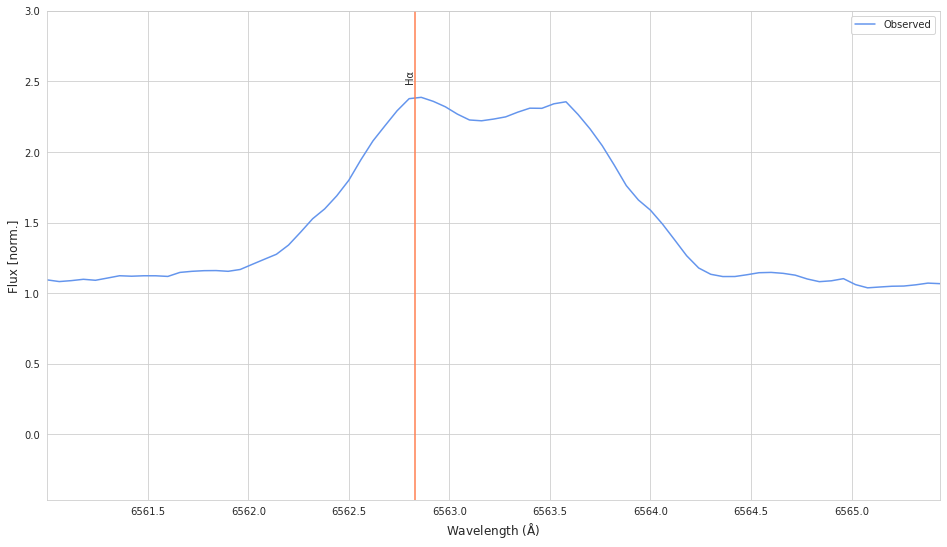

In [21]:
f, ax = plt.subplots(figsize=(16,9))
#ax.plot(wl_grid, 1- predicted_masked.loc[PLOT_INDEX,:], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid, original_masked_halpa_data.loc[344,:], color="cornflowerblue", lw=1.5,label="Observed")
#ax.plot(wl_grid, 1- difference.loc[PLOT_INDEX,:], color="black", linestyle='--',lw=1.5,label="Difference")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((original_masked_halpa_data.loc[344,:].min()- 1.50),3)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

In [39]:
PLOT_INDEX=476622

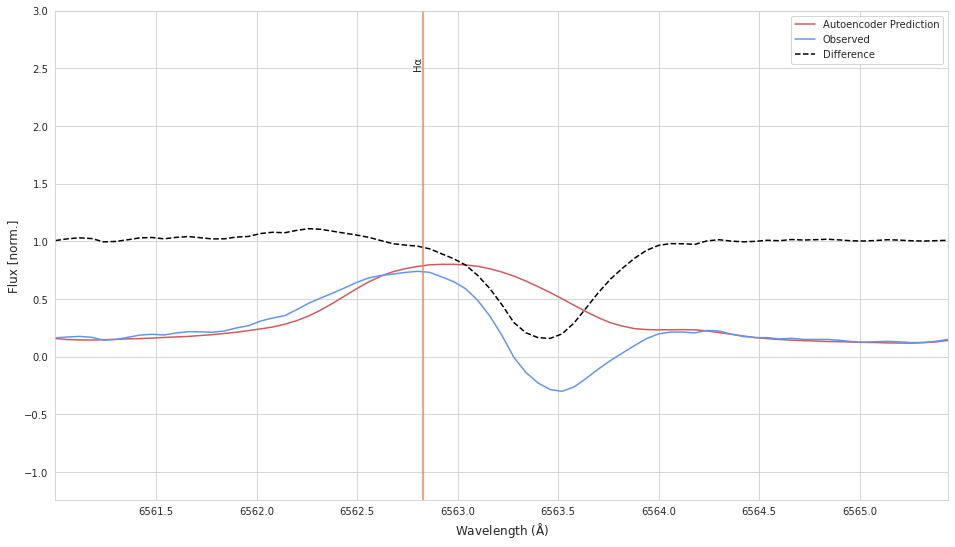

In [42]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, 1- predicted_masked.loc[PLOT_INDEX,:], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid, 1- original_masked.loc[PLOT_INDEX,:], color="cornflowerblue", lw=1.5,label="Observed")
ax.plot(wl_grid, 1- difference.loc[PLOT_INDEX,:], color="black", linestyle='--',lw=1.5,label="Difference")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((original_masked.loc[PLOT_INDEX,:].min()- 1.50),3)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

In [43]:
PLOT_INDEX = 0

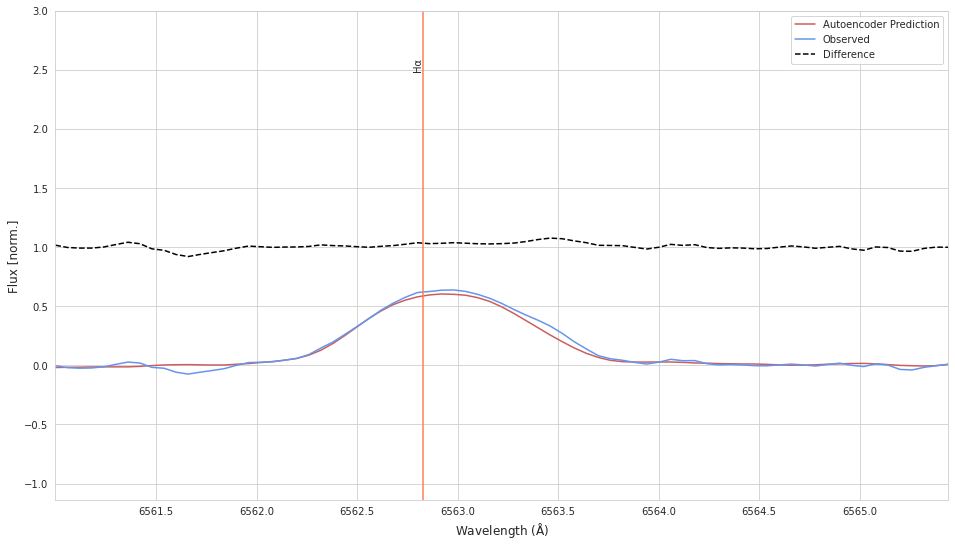

In [44]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, 1- predicted_masked.loc[PLOT_INDEX,:], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid, 1- original_masked.loc[PLOT_INDEX,:], color="cornflowerblue", lw=1.5,label="Observed")
ax.plot(wl_grid, 1- difference.loc[PLOT_INDEX,:], color="black", linestyle='--',lw=1.5,label="Difference")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((original_masked.loc[PLOT_INDEX,:].min()- 1.50),3)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

In [52]:
PLOT_INDEX = 0

In [53]:
test = Spectrum1D(spectral_axis=wl_grid*u.AA,flux=(1-difference.loc[PLOT_INDEX,:]).to_numpy()*u.Jy)

In [54]:
print(equivalent_width(test,continuum=1))

-0.022394133593952873 Angstrom
